In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib, random, os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [ ]:
data_dir = "/content/drive/MyDrive/Dataset/Cat-Dog Classification"

# EDA

In [ ]:
data_dir = pathlib.Path(data_dir)
classname = np.array(sorted([item.name for item in data_dir.glob("*")]))
classname

array(['Cat', 'Dog'], dtype='<U3')

In [ ]:
def view_random_image(target_dir, target_class = False):
    # Set up the target directories
    if(target_class == False):
      target_forder = target_dir
    else:
      target_forder = target_dir + target_class

    # get a random image path
    random_image = random.sample(os.listdir(target_forder), 1)

    # Read in image and plot it using matplotlib
    img = mpimg.imread(target_forder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');

    print(f"image shape: {img.shape}\n image dtypes: {img.dtype}")

image shape: (500, 375, 3)
 image dtypes: uint8


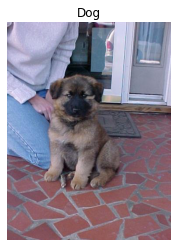

In [ ]:
view_random_image("/content/drive/MyDrive/Dataset/Cat-Dog Classification/", random.choice(classname))

# Get Dataset from Directory and Augmented it

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                                                          rescale=1/255.,
                                                          rotation_range=0.2,
                                                          shear_range=0.2,
                                                          zoom_range=0.2,
                                                          validation_split=0.2,
                                                          horizontal_flip=True)

train_data = datagen.flow_from_directory(data_dir,
                                         target_size = (224, 224),
                                         batch_size = 32,
                                         class_mode = 'binary',
                                         subset = "training"
                                         )

val_data = datagen.flow_from_directory(data_dir,
                                         target_size = (224, 224),
                                         batch_size = 32,
                                         class_mode = 'binary',
                                         subset = "validation"
                                         )

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# See How the Data Looks Like